In [165]:
import pandas as pd
data = pd.read_csv('https://stats.idre.ucla.edu/stat/data/binary.csv')

In [166]:
data

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


In [132]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [133]:
corr = data.corr()

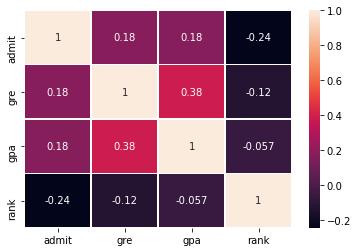

In [134]:
ax = sns.heatmap(corr, linewidth=0.5, annot=True)
plt.show()

In [135]:
data['admit'].unique()

array([0, 1])

In [136]:
count_no_admit = len(data[data['admit']==0])
count_admit = len(data[data['admit']==1])
pct_of_no_admit = count_no_admit/(count_no_admit+count_admit)
print("percentage of rejects is", pct_of_no_admit*100)
pct_of_admit = count_admit/(count_no_admit+count_admit)
print("percentage of admits", pct_of_admit*100)

percentage of rejects is 68.25
percentage of admits 31.75


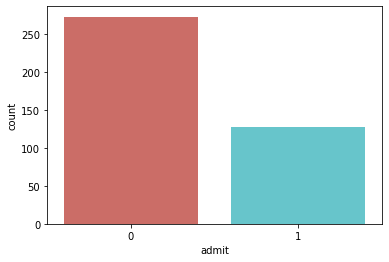

In [137]:
sns.countplot(x= 'admit', data= data, palette = 'hls')
plt.show()

array([[<AxesSubplot:title={'center':'admit'}>,
        <AxesSubplot:title={'center':'gre'}>],
       [<AxesSubplot:title={'center':'gpa'}>,
        <AxesSubplot:title={'center':'rank'}>]], dtype=object)

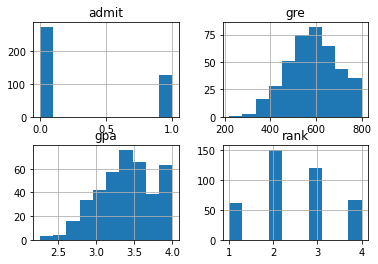

In [138]:
data.hist()

In [139]:
X = data[['gre','gpa','rank']]
y = data['admit']

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [142]:
X_train

,gre,gpa,rank
172,680,3.48,3
393,620,3.75,2
123,500,2.98,3
54,660,3.34,3
176,520,2.62,2
...,...,...,...
305,580,3.46,4
322,500,3.01,4
177,620,3.23,3
208,540,3.16,3


In [143]:
from sklearn.linear_model import LogisticRegression

In [144]:
model = LogisticRegression()

In [145]:
model.fit(X_train, y_train)

LogisticRegression()

In [146]:
y_test

170    0
80     0
389    0
62     0
348    0
      ..
261    0
194    1
72     0
265    0
214    1
Name: admit, Length: 120, dtype: int64

In [147]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [148]:
model.score(X_test,y_test)

0.6916666666666667

In [149]:
#RFE[Recursive Feature Elimination]

In [150]:
data_final_vars=data.columns.values.tolist()
y=['admit']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True]
[1 1 1]


/Users/anonymous/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [151]:
import statsmodels.api as sm


In [152]:
model2 = sm.Logit(y_train, X_train)


In [153]:
result = model2.fit()


Optimization terminated successfully.
         Current function value: 0.582484
         Iterations 5


In [154]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  280
Model:                          Logit   Df Residuals:                      277
Method:                           MLE   Df Model:                            2
Date:                Fri, 26 Mar 2021   Pseudo R-squ.:                 0.06839
Time:                        12:05:53   Log-Likelihood:                -163.10
converged:                       True   LL-Null:                       -175.07
Covariance Type:            nonrobust   LLR p-value:                 6.314e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0014      0.001      1.119      0.263      -0.001       0.004
gpa            0.0436      0.238      0.183      0.855      -0.424       0.511
rank          -0.6886      0.140     -4.903      0.000      -0.964      -0.413
==============================================================================
"""

In [155]:
y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.69


In [156]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[74  8]
 [29  9]]


In [157]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80        82
           1       0.53      0.24      0.33        38

    accuracy                           0.69       120
   macro avg       0.62      0.57      0.56       120
weighted avg       0.66      0.69      0.65       120



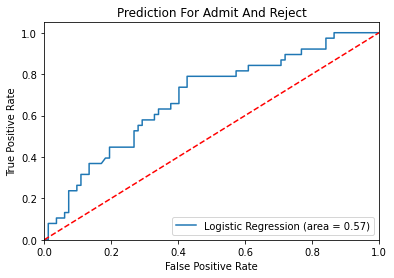

In [158]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Prediction For Admit And Reject')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()